<a href="https://colab.research.google.com/github/smithcorp/github-demo/blob/main/Recommendation_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install surprise

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#from surprise.model_selection import train_test_split, Kfold
from surprise.prediction_algorithms.matrix_factorization import SVD

from collections import defaultdict

import warnings
warnings.filterwarnings ('ignore')


In [30]:
from surprise.model_selection import train_test_split, KFold

In [31]:
book = pd.read_csv ('/content/drive/MyDrive/Recommendation_ex/Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Recommendation_ex/Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/Recommendation_ex/Users.csv')

In [32]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [33]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [34]:
df = pd.merge(ratings, book.drop_duplicates(['ISBN']), on='ISBN', how='left')

In [35]:
df.drop(['Image-URL-S','Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [36]:
df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996,Scholastic


In [37]:
df.rename(columns={'User-ID':'user_id', 'Book-Rating':'rating','ISBN':'book_id'}, inplace=True)

In [38]:
df

,user_id,book_id,rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996,Scholastic


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   user_id              1149780 non-null  int64 
 1   book_id              1149780 non-null  object
 2   rating               1149780 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031135 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
dtypes: int64(2), object(5)
memory usage: 70.2+ MB


In [40]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='rating', ylabel='count'>

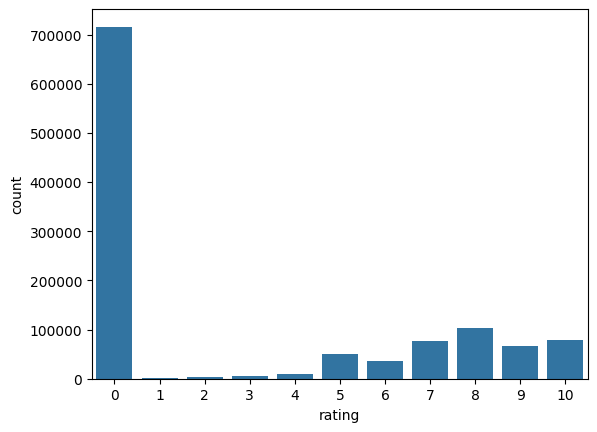

In [41]:
sns.countplot(data=df,x='rating')

In [42]:
df.drop(df.index[df['rating']==0],inplace=True)

<Axes: xlabel='rating', ylabel='count'>

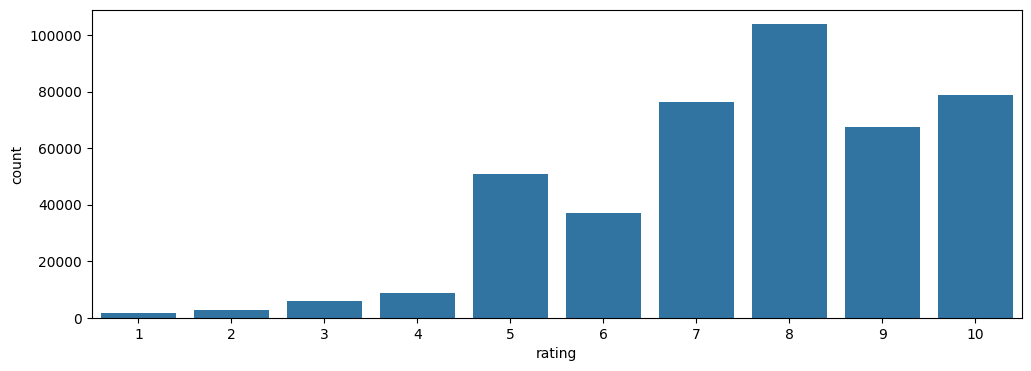

In [43]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='rating')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 1 to 1149779
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   user_id              433671 non-null  int64 
 1   book_id              433671 non-null  object
 2   rating               433671 non-null  int64 
 3   Book-Title           383842 non-null  object
 4   Book-Author          383841 non-null  object
 5   Year-Of-Publication  383842 non-null  object
 6   Publisher            383840 non-null  object
dtypes: int64(2), object(5)
memory usage: 26.5+ MB


In [45]:
df.user_id.nunique()

77805

In [46]:
df.book_id.nunique()

185973

In [47]:
df.groupby(['user_id','book_id']).count()

rating  Book-Title  Book-Author  Year-Of-Publication  \
user_id book_id                                                            
8       0002005018       1           1            1                    1   
        074322678X       1           1            1                    1   
        0887841740       1           1            1                    1   
        1552041778       1           1            1                    1   
        1567407781       1           1            1                    1   
...                    ...         ...          ...                  ...   
278854  0375703063       1           1            1                    1   
        042516098X       1           1            1                    1   
        0425163393       1           1            1                    1   
        0553275739       1           1            1                    1   
        0553579606       1           1            1                    1   

                    Publisher  
user_id book_id                
8       0002005018          1  
        074322678X          1  
        0887841740          1  
        1552041778          1  
        1567407781          1  
...                       ...  
278854  0375703063          1  
        042516098X          1  
        0425163393          1  
        0553275739          1  
        0553579606          1  

[433671 rows x 5 columns]

In [48]:
df.groupby(['user_id','book_id']).count()['rating'].sum()

433671

In [49]:
df.book_id.value_counts()

0316666343     707
0971880107     581
0385504209     487
0312195516     383
0679781587     333
              ... 
0140441905       1
0886777267       1
0671697951       1
0553560956       1
05162443314      1
Name: book_id, Length: 185973, dtype: int64

In [50]:
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

KeyboardInterrupt: 

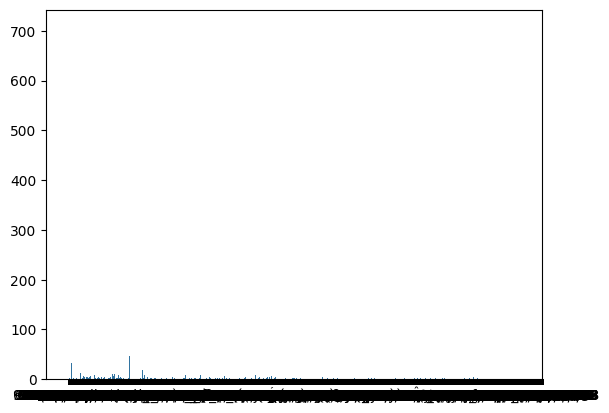

In [27]:
sns.countplot(data=df,x='book_id')

In [ ]:
df[df['book_id']=='0316666343']

In [52]:
df[df['book_id']=='0316666343']['rating'].value_counts().plt(kind='bar')

AttributeError: 'Series' object has no attribute 'plt'

In [53]:
df.user_id.value_counts()

11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
          ... 
114079       1
114081       1
114096       1
114115       1
276723       1
Name: user_id, Length: 77805, dtype: int64

In [54]:
users = df.user_id

In [55]:
ratings_count = dict()
for user in users:
  if user in ratings_count:
    ratings_count[user] +=1

  else:
    ratings_count[user] = 1

In [56]:
RATINGS_CUTOFF = 50

In [57]:
remove_users =[]
for user, num_ratings in ratings_count.items():
  if num_ratings<RATINGS_CUTOFF:
    remove_users.append(user)

    df =df.loc[~df.user_id.isin(remove_users)]

KeyboardInterrupt: 

In [ ]:
df.shape

In [ ]:
books =df.book_id

ratings_count = dict()
for book in books:
  if book in ratings_count:
    ratings_count[book]+=1
    else:
      ratings_count[book]=1

In [ ]:
from os import remove
RATINGS_CUTOFF = 10

remove_books =[]
for book, num_ratings in ratings_count.items():
  if num_ratings<RATINGS_CUTOFF:
    remove_books.append(book)

    df = df.loc[~df.book_id.isin(remove)]

In [ ]:
df.shape

In [62]:
df.nunique()

user_id                 59595
book_id                168895
rating                     10
Book-Title             124752
Book-Author             57480
Year-Of-Publication       180
Publisher               10803
dtype: int64

In [59]:
df.groupby('user_id').count()['book_id']

user_id
183        91
254        58
638        54
643        70
1025       50
         ... 
277427    150
278026     50
278137     59
278188     52
278418    117
Name: book_id, Length: 59595, dtype: int64

In [60]:
count_interactions = df.groupby('user_id').count()['book_id']

<Axes: xlabel='book_id', ylabel='Count'>

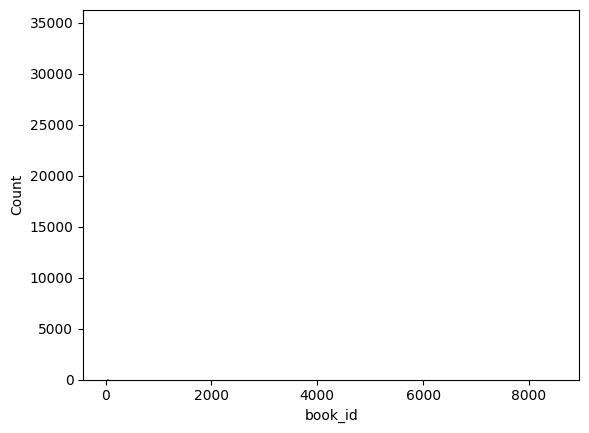

In [61]:
sns.histplot(count_interactions)

In [63]:
avg_rating = df.groupby('book_id').mean()['rating']
count_rating = df.groupby('book_id').count()['rating']

final_rating = pd.DataFrame({'avg_rating':avg_rating,'rating_count':count_rating})

In [64]:
final_rating

,avg_rating,rating_count
book_id,,
0330299891,6.0,1
0375404120,3.0,1
9022906116,7.0,1
#6612432,5.0,1
'9607092910',10.0,1
...,...,...
"\8888809228\""""",5.0,1
"\9170010242\""""",10.0,1
ooo7156103,7.0,1


In [71]:
def top_n_books(data,n,min_interactions=100):
  recommendations = data[data.rating_count>min_interactions]
  recommendations = recommendations.sort_values(by = 'avg_rating', ascending=False)
  return recommendations.index[:n]

In [72]:
res = top_n_books(final_rating,5, 10)
list_of_books =[]

for i in res:
  list_of_books.append(df[df['book_id']==str(i)]['Book-Title'].unique()[0])
  list_of_books

In [73]:
list_of_books

['Dilbert: A Book of Postcards',
 'Harry Potter and the Chamber of Secrets Postcard Book',
 'Fox in Socks (I Can Read It All by Myself Beginner Books)',
 'The Giving Tree',
 'The Two Towers (The Lord of the Rings, Part 2)']

In [74]:
res = top_n_books(final_rating,5, 100)
list_of_books =[]

for i in res:
  list_of_books.append(df[df['book_id']==str(i)]['Book-Title'].unique()[0])
  list_of_books

In [75]:
list_of_books

['Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 "Harry Potter and the Sorcerer's Stone (Book 1)"]

In [77]:
from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset

from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms.knns import KNNBasic